---
# Grid Theory

Konstantin Holzhausen (konstantin.holzhausen@fys.uio.no)

7th July 2022

---
This notebook is commenting on the plane wave composition of [hexagonal Grid Cell ratemap patterns](https://onlinelibrary.wiley.com/doi/10.1002/hipo.20244). In particular, we analytically study the relationships between the symmetries of the pattern-generating plane waves and the symmetries of the generated pattern. We do that by comprehensively studying the relationship between the $\vec{k}$-vectors (wave vectors) of the plane waves and the **Primitive Basis Vectors** of the hexagonal lattice formed by the peaks of the generated pattern.  

## 2D Hexagonal Lattice, Basis Vectors, Primitive Basis, Unit Cells and the Wigner-Seitz-Cell

In this section, we are going to review the fundamental definitions and notions of lattice theory with the example of a planar (two-dimensional) hexagonal lattice. To support our intuition, we start by creating a plot of a hexagonal lattice itself.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.patches as patches

Each vertex $i$, or rather grid or lattice point, on a lattice $\mathcal{L}$ can be represented by a **lattice vector** $\vec{R}_{i}$. On a **hexagonal lattice**, all nearest neighbouring points $\vec{R}_{i}, \vec{R}_{j} \in \mathcal{L}$ have the same distance $d_{i,j} = \left| \vec{R}_{i} - \vec{R}_{j} \right|$ to each other. The **distances between neighbouring lattice points are called the lattice constants** $a$, $b$, ... . In case of the planar hexagonal lattice, the corresponding difference vectors enclose a $60^{\circ}$ angle.

Since the lattice is two-dimensional, it is spanned by a set of two basis vectors. The **choice of the basis is** first of all **arbitrary** and **ambiguous**. Consequently, there is no unique choice of basis vectors if we do not demand any further constraints. The only constraint so far is, that both vectors have to enclose  an integer multiple of a $60^{\circ}$ angle $\alpha$ that meets $0^{\circ} \not\equiv \alpha \, \textrm{mod}\, 60^{\circ}$.

A **basis** that reaches every lattice, and thus **completely spans the lattice** is called a **primitive basis**.

---
#### Definition: Primitive Basis

A set of basis vectors $\{ a_{i} \}_{i \in I}$ that completely spans the lattice is called a primitive basis. Consequently, every lattice vector $\vec{R}_{i} \in \mathcal{L}$ can be expressed as a linear combination of basis vectors with integer coefficients.

$$\vec{R}_{i} = \sum_{i} \, \alpha_{i}\, \vec{a}_{i} \quad \textrm{with} \quad \alpha_{i} \in \mathbb{Z}$$

The lengths of primitive basis vectors correspond to the respective lattice constants along the specified axis that is co-aligned with the direction of the primitive basis vector.

---

In [2]:
def rotmat(theta: float, degrees: bool=True):
    if degrees:
        theta = theta*np.pi / 180.
    ct = np.cos(theta) # cos(theta)
    st = np.sin(theta) # sin(theta)
    return np.array([[ct, -st], [st, ct]])

In [3]:
# define matrix translating rotations around 60 degrees counter clock-wise
rot60 = rotmat(60.)

# define lattice constant
a = 1.0

# primitive basis vectors of hexagonal grid
a_0 = a*np.array([1., 0.])
a_1 = a*rot60 @ a_0

---
#### Unit Cell

The unit cell of a lattice is the smallest building block of that lattice (in terms of volume or area). Repetition of the unit cell in every direction creates the lattice structure. In case of the planar hexagonal lattice, each unit cell tiles space perfectly (see plot below). Thus, because of the periodicity of the lattice, the unit cell shares and defines all properties of the lattice itself.

Each unit cell contains in total exactly one lattice point, hence the name. The unit cell is not unambiguously defined either. Here, we review only two: the **primitive unit cell** and the **Wigner-Seitz** cell.

The **primitive unit cell** is the parallelepiped which is spanned by the primitive basis vectors (see plot below). Thus, the volume of the primitive unit cell of the planar hexagonal lattice is given by

$$V_{p} = \left| \vec{a}_{0} \times \vec{a}_{1} \right| = a^{2} \sin{\left( 60^{\circ} \right)} = \frac{\sqrt{3}}{2}\, a^{2} \quad \textrm{.}$$

The unit cell of highest symmetry is the **Wigner-Seitz cell**. It is constructed by applying **Voronoi decomposition** to the lattice. This is particularly simple for lattices because of their regularity. We are not going to explain how this is done in pratice. We suggest the interested reader to make use of pertinent literature on this topic. As a result of the construction, space is euqally partitioned between lattice points. In case of the planar hexagonal lattice, the Wigner-Seitz cell is shaped like a hexagon itself. However, with respect to the hexagon of the lattice, the Wigner-Seitz cell is rotated by $30^{\circ}$. It is noticed that the lattice point is located at the center of the Wigner-Seitz cell in contrast to the primitive unit cell, where the lattice points form the corners of the parallelepiped. In many situations, reviewing Wigner-Seitz cell instead of the primitive unit cell is beneficial because of its high symmetry.

___

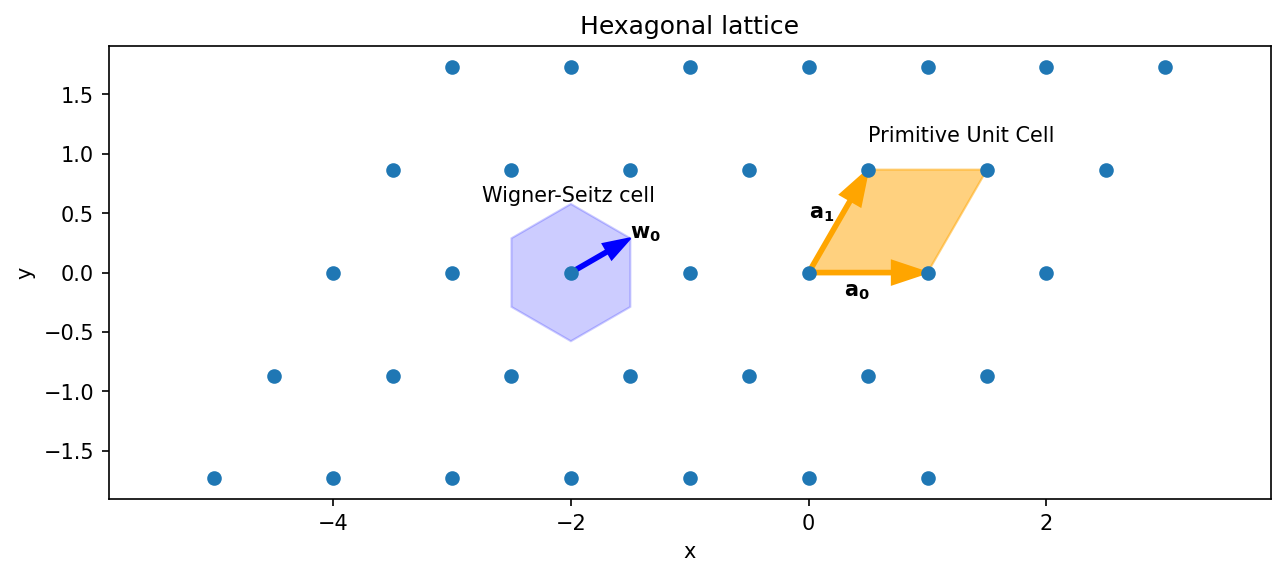

In [4]:
# draw hexagonal grid

x = np.arange(-4, 2 + 1)
y = np.arange(-2, 2 + 1)
xv, yv = np.meshgrid(x, y)
hex_grid = xv[..., None]*a_0 + yv[..., None]*a_1

gx, gy, no_dim = hex_grid.shape
no_gridpoints = gx*gy
hex_list = hex_grid.reshape(no_gridpoints, no_dim)

fig, ax = plt.subplots(figsize=(10., 4.), dpi=150)

# first primitive lattice vector
ax.text(0.3*a_0[0], -0.2, 
        r"$\mathbf{a_0}$",
       )
ax.arrow(0.0, 0.0, a_0[0], a_0[1],
         color="orange",
         width=0.03,
         head_width=.2,
         length_includes_head=True,
         label=r"a_0"
        )

# second primitive lattice vector
ax.text(0., .3*a_1[1] + 0.2, 
        r"$\mathbf{a_1}$",
       )
ax.arrow(0.0, 0.0, a_1[0], a_1[1],
         color="orange",
         width=0.03,
         head_width=.2,
         length_includes_head=True,
         label=r"a_1",
        )

# primitive unit cell
x = [0.0, a_0[0], a_0[0] + a_1[0], a_1[0]]
y = [0.0, a_0[1], a_0[1] + a_1[1], a_1[1]]
ax.text(0.5, 1.1, 
        r"Primitive Unit Cell",
       )
ax.add_patch(
    patches.Polygon(
        xy=list(zip(x,y)), 
        fill=True,
        color='orange',
        alpha=0.5,
    )
)

# Wigner-Seitz cell
# define radius of enclosing circle
r_wsc = a / (2*np.cos(np.pi / 6))
rot30 = rotmat(30.)

# Wigner-Seitz cell vertices are rotated
# create first vertex
w_0 = r_wsc*(rot30 @ np.array([1.0, 0.0]))

# all the others are created by rotation
ws = [w_0]
for i in range(5):
    ws.append(rot60 @ ws[-1])
ws = np.array(ws)
    
# plot the Wigner-Seitz cell
r_offset = -2*a_0
ws = ws + r_offset
ax.text(
    -2.75*a_0[0],
    .6,
    r"Wigner-Seitz cell"
)
ax.add_patch(
    patches.Polygon(
        xy=list(ws),
        fill=True,
        color="blue",
        alpha=0.2,
    )
)
ax.text(
    *ws[0].T,
    r"$\mathbf{w_{0}}$"
)
ax.arrow(r_offset[0],
         r_offset[1],
         ws[0, 0] - r_offset[0],
         ws[0, 1] - r_offset[1],
         color="blue",
         width=0.03,
         head_width=.15,
         length_includes_head=True,
         label=r"a_1",
        )

ax.set_title(r"Hexagonal lattice")
ax.set_xlabel(r"x")
ax.set_ylabel(r"y")
ax.scatter(*hex_list.T)
ax.axis("equal")
plt.show()

#### Relevant properties from construction

The construction of the Wigner-Seitz cell around one lattice point can be summarized as follows:

1. Draw the connecting lines between this lattice point and all of its surrounding nearest neighbours.
2. Draw all of the lines perpendicular bisectors
3. The intersections of these perpendicular bisectors are the vertices of the Wigner-Seitz cell. Consequently, the perpendicular bisectors form the faces of the Wigner-Setiz cell.

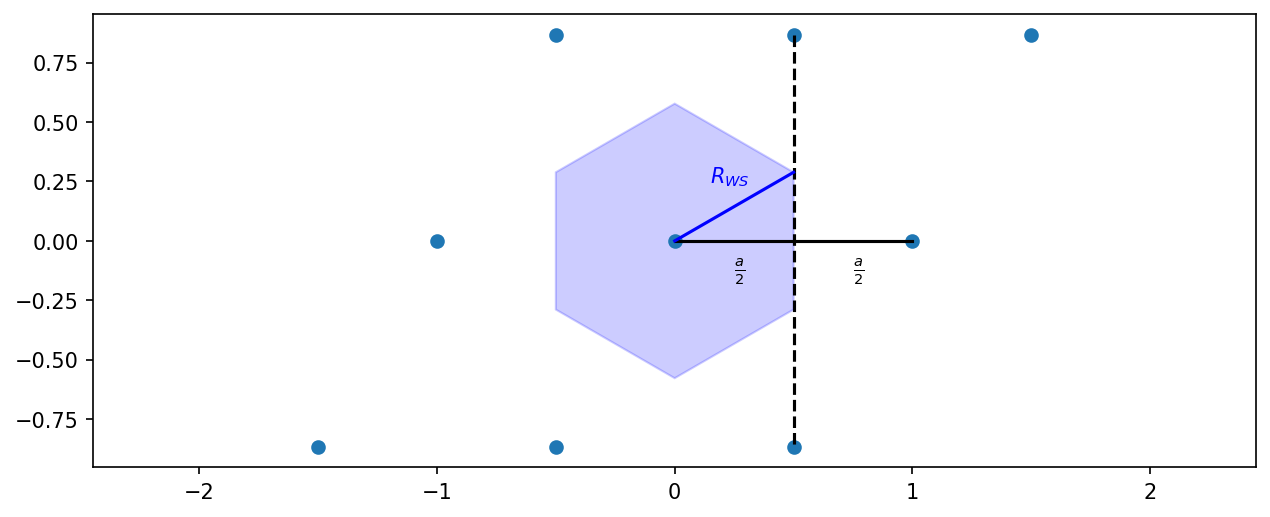

In [5]:
# draw small hexagonal grid

xs = np.arange(-1, 1 + 1)
ys = np.arange(-1, 1 + 1)
xvs, yvs = np.meshgrid(xs, ys)
hex_grid_small = xvs[..., None]*a_0 + yvs[..., None]*a_1

gx_s, gy_s, no_dim_s = hex_grid_small.shape
no_gridpoints_s = gx_s*gy_s
hex_list_small = hex_grid_small.reshape(no_gridpoints_s, no_dim_s)

fig, ax = plt.subplots(figsize=(10., 4.), dpi=150)

# draw Wigner-Seitz cell
ax.add_patch(
    patches.Polygon(
        xy=list(ws - r_offset),
        fill=True,
        color="blue",
        alpha=0.2,
    )
)
# draw lines
O = np.array([0.0, 0.0])
ax.plot(
    *np.array([O, a_0]).T,
    color='black',
)
ax.text(
    *(3.*a_0 / 4. + np.array([0., -0.15])),
    r"$\frac{a}{2}$",
    color="black"
)
ax.text(
    *(a_0 / 4. + np.array([0., -0.15])),
    r"$\frac{a}{2}$",
    color="black"
)
ax.plot(
    *np.array([a_1, rot60.T @ a_0]).T,
    color="black",
    linestyle="dashed",
)
ax.plot(
    *np.array([O, w_0]).T,
    color="blue"
)
ax.text(
    *(w_0 / 2. + np.array([-0.1, 0.1])).T,
    r"$R_{WS}$",
    color="blue",
)

# draw hex-grid
ax.scatter(*hex_list_small.T)
ax.axis('equal')
plt.show()

Now, that we know the geometric construction of the Wigner-Seitz cell, we know that the primitive basis vector $\vec{a}_0$ of the hexagonal lattice and the first vertex vector of the Wigner-Seitz cell $\vec{w}_{0}$ enclose a $30^{\circ}$ angle

$$\angle\; \left( \vec{a}_0,\, \vec{w}_0 \right) = 30^{\circ} = \frac{\pi}{6} \quad \textrm{.}$$

Furthermore, we know that the faces of the Wigner-Seitz cell bisect the line segments connecting the nearest neighbours. Since the length of these line segments is the definition of the lattice constant $a$, each of the bisectors has to be $\frac{a}{2}$ long.

Based on these informations, we can calculate the length $\| \vec{w}_{0} \| = R_{WS}$

$$\cos{\left(30^{\circ}\right)} = \frac{a / 2}{R_{WS}} \\ 
\Rightarrow \; R_{WS} = \frac{a}{2\, \cos{\left(30^{\circ}\right)}}  = \frac{a}{2\, \cos{\left( \pi / 6 \right)}} = \frac{a}{\sqrt{3}} \quad \textrm{.}$$

Knowing this, it is trivial to calculate the volume of the Wigner-Seitz cell $V_{WSC}$

$$V_{WSC} = 3 \, \| \vec{w}_{0} \times \vec{w}_{1} \| = 3\, R_{WS}^{2} \,\sin{\left( 60^{\circ} \right)} = 3\, \frac{a^{2}}{3}\, \frac{\sqrt{3}}{2} = \frac{\sqrt{3}}{2}\, a^{2}.$$

Thus, by construction the Wigner-Seitz cell and the primitive unit cell both contain exactly one lattice point in total and take the exact same amount of volume $V_{p} = V_{WSC} = \frac{\sqrt{3}}{2}\, a^{2}$.

## Generated Grid Cells

According to [Solstad et al.](https://onlinelibrary.wiley.com/doi/10.1002/hipo.20244), grid cell like ratemaps can be represented by a superposition of three planar waves with wave vectors $\{\vec{k}_{i}\}_{i \in \{1, 2, 3\}}$. As a consequence, the ratemap $\Phi_{\mu}$ of a grid cell $\mu \in \mathcal{G}$ out of the set of all grid cells $\mathcal{G}$ with phase $\vec{\rho}_{\mu}$ on a domain $\Omega$ can ideally be expressed as 

$$
    \Phi_{\mu}(\vec{r}) \; \propto \; \sum_{k = 1}^{3}\, \varphi(\vec{r}) = \sum_{k = 1}^{3} \, \cos{\left( 2 \pi\, f \, \langle \vec{r} - \vec{\rho}_{\mu},\, \vec{k}_{k}\rangle  \right)} \quad \textrm{on} \quad \Omega \quad \textrm{.}
$$

$f$ denotes the spatial frequency of the planar waves if $\|\vec{k}_{i}\| = 1$, and relates to the angular frequency $\omega = 2\, \pi \, f$. As we will see within this section, it turns out that $f$ **is not the spatial frequency of the resulting grid pattern**, but it is related to that. The three k-vectors are required to pairwise enclose a $60^{\circ}$ angle if the resulting grid pattern is supposed to be hexagonal. 

Arbitrary orientations of the grid patterns can either be generated by rotating the k-vectors or the coordinate system. In the following, we consider that $\vec{k}_{0}$ is aligned with the cardinal x-Axis

$$
 \vec{k}_{0} = \begin{pmatrix} 1 \\ 0 \end{pmatrix} \quad \textrm{.}
$$

Consequently, the other two k-vectors are given by

$$
 \vec{k}_{1} = \begin{pmatrix} \cos{(60^{\circ})} \\ \sin{(60^{\circ})} \end{pmatrix} = \frac{1}{2}\, \begin{pmatrix} 1 \\ \sqrt{3} \end{pmatrix}
$$

and

$$
 \vec{k}_{1} = \begin{pmatrix} \cos{(120^{\circ})} \\ \sin{(120^{\circ})} \end{pmatrix} = \frac{1}{2}\, \begin{pmatrix} -1 \\ \sqrt{3} \end{pmatrix}
$$

respectively. The following figure shows the resulting pattern for an angular frequency of $\omega\,=\,2 \pi$, thus $f=1$, and zero phase with the three k-vectors.

In [6]:
# define k vectors of planar waves
k_1 = np.array([1.0, 0.0])
k_2 = rot60 @ k_1
k_3 = rot60 @ k_2
ks = np.array([k_1, k_2, k_3])

def Phi(r, ks, f=1.0, rho=np.array([0.0, 0.0])):
    res = 0.0
    for k in ks:
        res += np.cos(2*np.pi*f*(r - rho) @ k)
    return res

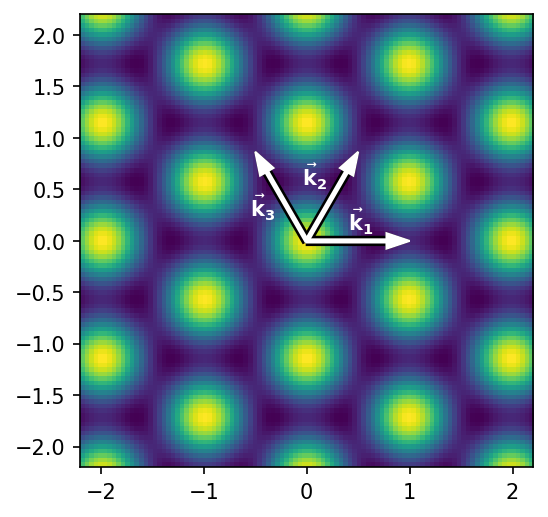

In [7]:
# plot synthetic grid cells
min_val = -2.2
max_val = 2.2
res = 100

x_gc = np.linspace(min_val, max_val, num=res)
y_gc = np.linspace(min_val, max_val, num=res)

xv_gc, yv_gc = np.meshgrid(x_gc, y_gc)
rv_gc = np.stack([xv_gc, yv_gc], axis=-1)

phi_vals = Phi(rv_gc, ks)

fig, ax = plt.subplots(figsize=(4., 4.), dpi=150)
ax.imshow(phi_vals, extent=[min_val, max_val, min_val, max_val], alpha=1., zorder=0)
# plot k=vectors
# k_1
ax.arrow(*O.T,
         *k_1.T,
         color="white",
         width=0.03,
         head_width=.15,
         length_includes_head=True,
         label=r"a_1",
         zorder=2.,
        )
ax.arrow(*O.T,
         *k_1.T,
         color="black",
         width=0.08,
         head_width=.15,
         length_includes_head=True,
         label=r"a_1",
         zorder=1.,
        )
ax.text(*(k_1 / 2. + np.array([-0.1, 0.1])).T, r"$\mathbf{\vec{k}_1}$", color='white')
# k_2
ax.arrow(*O.T,
         *k_2.T,
         color="white",
         width=0.03,
         head_width=.15,
         length_includes_head=True,
         label=r"a_1",
         zorder=2.,
        )
ax.arrow(*O.T,
         *k_2.T,
         color="black",
         width=0.08,
         head_width=.15,
         length_includes_head=True,
         label=r"a_1",
         zorder=1.,
        )
ax.text(*(k_2 / 2. + np.array([-0.3, +0.1])).T, r"$\mathbf{\vec{k}_2}$", color='white')
# k_3
ax.arrow(*O.T,
         *k_3.T,
         color="white",
         width=0.03,
         head_width=.15,
         length_includes_head=True,
         label=r"a_1",
         zorder=2.,
        )
ax.arrow(*O.T,
         *k_3.T,
         color="black",
         width=0.08,
         head_width=.15,
         length_includes_head=True,
         label=r"a_1",
         zorder=1.,
        )
ax.text(*(k_3 / 2. + np.array([-0.3, -0.2])).T, r"$\mathbf{\vec{k}_3}$", color='white')
plt.show()

With the aid of the upper plot we notice the following: 

1. Because we chose $\cos$ instead of $\sin$, the pattern is centred around and starts with a peak in the origin of our coordinate system, where the $k$-vectors start. 
2. **The direction of the $k$-vectors is not the direction of what appears to be the primitive basis of the appearing hexagonal pattern lattice!**

The second point is of particular interest for us. In following the direction of any of the $k$-vectors, we do not approach the nearest neighbouring lattice point from the centre, but the second nearest one. The latter one appears to be $2 \cdot f^{-1}$ (that is the two-fold of the **spatial period** $\mathbf{T = f^{-1}}$   of the plane waves) distant from the centre. And indeed, it is relatively easy to show that the pattern is $2 \cdot f$-periodic in the direction of $\vec{k_{1}}$. In order to show this, we study the pattern under the translation operator

$$\mathcal{T}_{\vec{k}_{0}}(2\, f): \vec{r} \; \mapsto \; \vec{r} + 2 \cdot f\, \vec{k}_{0}$$

$$
    \mathcal{T}_{\vec{k}_{0}}(2\, f)\, \Phi(\vec{r}) \quad = \quad \sum_{k = 1}^{3} \cos{\left( 2 \pi\, f\, \langle \vec{r} + 2\, f^{-1}\, \vec{k}_{1} - \vec{\rho}_{0},\; \vec{k}_{k} \rangle \right)} \\
    \quad = \quad \sum_{k = 1}^{3} \cos{\left( 2 \pi\, f\, \langle \vec{r} - \vec{\rho}_{0},\; \vec{k}_{k} \rangle + 2 \pi \cdot 2\,  \langle \vec{k}_{1},\; \vec{k}_{k} \rangle \right)} \quad {.}
$$

Since 

$$
    \langle k_{1}, k_{i} \rangle = \begin{cases} 
        1 \quad \textrm{if}\; i=1 \\
        \cos{\left( \frac{\pi}{3} \right)} = \frac{1}{2} \quad \textrm{if}\, i=2 \\
        \cos{\left( \frac{2\, \pi}{3} \right)} = - \frac{1}{2} \quad \textrm{if}\,  i=3
    \end{cases} \quad \textrm{,}
$$

$$
    \mathcal{T}_{\vec{k}_{0}}(2\, f)\, \Phi(\vec{r}) \quad = \quad \cos{\left( 2 \pi\, f\, \langle \vec{r} - \vec{\rho}_{0},\; \vec{k}_{1} \rangle + 4\, \pi \right)} + \cos{\left( 2 \pi\, f\, \langle \vec{r} - \vec{\rho}_{0},\; \vec{k}_{2} \rangle + 2\, \pi \right)} + \cos{\left( 2 \pi\, f\, \langle \vec{r} - \vec{\rho}_{0},\; \vec{k}_{3} \rangle - 2\, \pi \right)} \\
    \quad = \quad \sum_{k = 1}^{3} \cos{\left( 2 \pi\, f\, \langle \vec{r} - \vec{\rho}_{0},\; \vec{k}_{k} \rangle \right)} \\
    \quad = \quad \Phi(\vec{r}) \quad \textrm{.}
$$

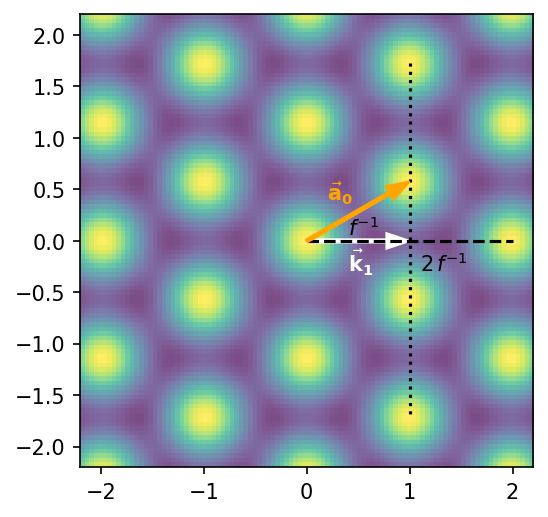

In [8]:
# plot synthetic grid cells
min_val = -2.2
max_val = 2.2
res = 100
f = 1.

x_gc = np.linspace(min_val, max_val, num=res)
y_gc = np.linspace(min_val, max_val, num=res)

xv_gc, yv_gc = np.meshgrid(x_gc, y_gc)
rv_gc = np.stack([xv_gc, yv_gc], axis=-1)

phi_vals = Phi(rv_gc, ks)

fig, ax = plt.subplots(figsize=(4., 4.), dpi=150)
# ratemap
ax.imshow(phi_vals, extent=[min_val, max_val, min_val, max_val], alpha=.7, zorder=0)
# k_1
ax.arrow(*O.T,
         *k_1.T,
         color="white",
         width=0.03,
         head_width=.15,
         length_includes_head=True,
         label=r"a_1",
         zorder=2.,
        )
ax.text(*(k_1 / 2. + np.array([-0.1, -0.3])).T, r"$\mathbf{\vec{k}_1}$", color='white')
ax.plot(
    *np.array([O, 2*k_1]).T,
    color='black',
    linestyle='dashed',
)
ax.text(
    *(k_1 + np.array([+.1, -.3])).T,
    r"$2\, f^{-1}$",
)
ax.text(
    *(k_1 / 2. + np.array([-.1, +.05])).T,
    r"$f^{-1}$",
)
ax.plot(
    *np.array([2*k_2, -2*k_3]).T,
    color='black',
    linestyle='dotted',
)
# primitive basis vector
r = 1 / (f*np.cos(np.pi / 6))
a_0 = r* rot30 @ k_1
ax.arrow(*O.T,
         *a_0.T,
         color="orange",
         width=0.03,
         head_width=.15,
         length_includes_head=True,
         label=r"a_1",
         zorder=2.,
        )
ax.text(
    *(a_0/2. + np.array([-.3, +.1])).T,
    r"$\mathbf{\vec{a}_{0}}$",
    color='orange',
)
plt.show()

How do we find the primitive basis vectors? First, it makes sense to notify what we know: the planar wave vectors $\vec{k}_{i}$! In addition to that, we know that the period of $\Phi$ in the direction of $\vec{k}_{1}$ is $T_{\vec{k}_{1}} = 2\, f^{-1}$. That means, that the line segment, which connects the centre lattice point with the next peak in $\vec{k}_{1}$-direction is $2\, f^{-1}$ long. In the figure above, this line segment is depicted as a black dashed line.

Next, we notice that the perpendicular bisector of this line segment, marked by the black dotted line, also goes through every other lattice point with another period, including two of the actual nearest neighbours of the centre point we are interested in. Thus, finding the primitive basis vectors of the grid cell lattice appears visually identical to the construction of the Wigner-Seitz cell vertices. Based on that, we know that

$$
    \angle \left( \vec{a}_{0},\, \vec{k}_{1} \right) = \frac{\pi}{6}
$$

and that the lattice constant is

$$
    a_{\textrm{GC}} = \frac{2\, f^{-1}}{2\, \cos{\left(\pi / 6\right)}} = \frac{2}{\sqrt{3}}\, f^{-1} \quad \textrm{.}
$$

Consequently, the primitive lattice vector $\vec{a}_{0}$ of the grid cell pattern lattice can be expressed as

$$
    \vec{a}_{0} \quad = \quad a_{GC} \, \frac{1}{2}\begin{pmatrix} \sqrt{3} \\ 1 \end{pmatrix} = f^{-1} \begin{pmatrix} 1 \\ \frac{1}{\sqrt{3}} \end{pmatrix} \quad \textrm{.}
$$

The respective other primitive basis vector belonging to the primitive basis that contains $\vec{a}_{0}$ can be obtained by rotating $\vec{a}_{0}$ by $60^{\circ}$ in any direction.

In order to prove that $\vec{a}_{0}$ is, indeed, a primitive basis vector of the lattice formed by the maxima in $\Phi$ with lattice constant $a_{GC}$, it is necessary and sufficient to demonstrate that $\Phi$ is $a_{GC}$-periodic in the direction $\vec{a}_{0}$. In order to do that, we study the effect of the translation operator $\mathcal{T}_{\vec{a}_{0}}(a_{GC})$

$$
    \mathcal{T}_{\vec{a}_{0}}(a_{GC})\, \Phi \left( \vec{r} \right) \quad =  \quad \Phi \left( \vec{r} + \vec{a}_{0} \right) \\
    = \quad \sum_{k = 1}^{3} \cos{\left( 2 \pi\, f\, \langle \vec{r} + \vec{a}_{0} - \vec{\rho}_{0},\; \vec{k}_{k} \rangle \right)} \\
    \quad \sum_{k = 1}^{3} \cos{\left( 2 \pi\, f\, \langle \vec{r} - \vec{\rho}_{0},\; \vec{k}_{k} \rangle  + 2\, \pi\, \langle \begin{pmatrix} 1 \\ 1 / \sqrt{3} \end{pmatrix}, \vec{k}_{k} \rangle \right)} \quad \textrm{.}
$$

By explicitely calculating the respective scalar products

$$
    \langle \begin{pmatrix} 1 \\ 1 / \sqrt{3} \end{pmatrix}, \vec{k}_{0} \rangle = \left(1, 1/\sqrt{3} \right) \cdot \begin{pmatrix} 1 \\ 0 \end{pmatrix} = 1 \\
    \langle \begin{pmatrix} 1 \\ 1 / \sqrt{3} \end{pmatrix}, \vec{k}_{0} \rangle = \left(1, 1/\sqrt{3} \right) \cdot \begin{pmatrix} 1 / 2 \\ \sqrt{3} / 2 \end{pmatrix} = \frac{1}{2} + \frac{1}{2} = 1 \\
    \langle \begin{pmatrix} 1 \\ 1 / \sqrt{3} \end{pmatrix}, \vec{k}_{0} \rangle = \left(1, 1/\sqrt{3} \right) \cdot \begin{pmatrix} -1 / 2 \\ \sqrt{3} / 2 \end{pmatrix} = -\frac{1}{2} + \frac{1}{2} = 0 \quad \textrm{,}
$$

we see

$$
    \mathcal{T}_{\vec{a}_{0}}(a_{GC})\, \Phi \left( \vec{r} \right) \quad =  \quad \Phi \left( \vec{r} + \vec{a}_{0} \right) \\
    = \quad \cos{\left( 2 \pi\, f\, \langle \vec{r} - \vec{\rho}_{0},\; \vec{k}_{1} \rangle + 2\, \pi \right)} + 
    \cos{\left( 2 \pi\, f\, \langle \vec{r} - \vec{\rho}_{0},\; \vec{k}_{2} \rangle + 2\, \pi \right)} +
    \cos{\left( 2 \pi\, f\, \langle \vec{r} - \vec{\rho}_{0},\; \vec{k}_{3} \rangle \right)} \\
    = \quad \sum_{k=1}^{3} \, \cos{\left( 2\, \pi\, f\, \langle \vec{r} - \vec{\rho}_{0}, \vec{k}_{k} \rangle \right)} = \Phi(\vec{r}) \quad \textrm{,}
$$

which proves our point, that $\Phi$ is $a_{GC}$-periodic in the direction of $\vec{a}_{0}$ which means that $\vec{a}_{0}$ is a primitive basis vector of the lattice formed by the maxima of $\Phi$ that we call the grid cell ratemap pattern and that $a_{GC}$ is its lattice constant!

To sum things up:
1. $\vec{a}_{0}$ of the grid lattice is oriented at an $30^{\circ}$ offset with respect to $\vec{k}_{1}$, a wave vector of the plane waves generating $\Phi$
2. The lattice constant of the grid cell pattern $a_{GC}$ relates to the spatial frequency of the planar waves $f$ as $a_{GC} = \sqrt{3} / 2 \; f^{-1}$.

If we want to do statistics with these kinds of patterns or analyse its composition and periodicity, we have to keep in mind that **$f$ is not $a_{GC}$, but we know how to transform between the two**, especially when constructing the Wigner-Seitz cell of the grid cell pattern!